In [60]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv("C:\\Users\\thoma\\Desktop\\ev-modelling-repo\\Data\\NHTS_trips_processed.csv")

In [62]:
df.shape

(795163, 12)

# Nur 1. Weg und dessen Startzeit relevant

In [63]:
filt = df["W_NR"] == 1
first_trip = df[filt]["W_SZ_MIN"]

In [64]:
first_trip.value_counts()

450     8005
600     7562
480     7305
540     7067
420     6730
        ... 
1268       1
1208       1
1430       1
1286       1
289        1
Name: W_SZ_MIN, Length: 1052, dtype: int64

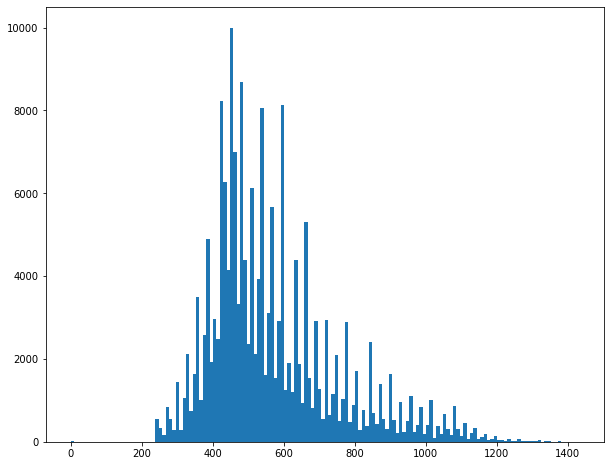

In [71]:
plt.figure(figsize=(10,8))
count, bins, ignored = plt.hist(first_trip, bins = 150 )

# Gaussian Mixture Model ermitteln

In [66]:
from sklearn.mixture import GaussianMixture

In [67]:
model_data = np.array(first_trip).reshape(-1,1)

In [68]:
gm_models = [None for i in range(10)]
model_data = np.array(first_trip).reshape(-1,1)
for i in range(1, 11):
    gm_models[i-1] = GaussianMixture(n_components=i, n_init=10).fit(model_data)
    

In [69]:
AIC = [m.aic(model_data) for m in gm_models]
BIC = [m.bic(model_data) for m in gm_models]

In [70]:
m_best = gm_models[np.argmin(AIC)]